# Examen parcial de Complex Networks

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

# 1. (7 puntos)
Implementar el algoritmo Erdős–Rényi y Barabasi-Albert para generar una red aleatoria y una libre de escala, para su implementación no es permitido utilizar librerías de redes, su implementación debe recibir los parámetros necesarios.

In [ ]:
def erdosRenyi(n, p):
  edges = []
  for i in range(n):
    for j in range(i + 1, n):
      if random.random() < p:
        edges.append((i, j))
  return edges

n = 10  # nodos
p = 0.2 # prob de conexion
g = erdosRenyi(n, p)
print("Erdős–Rényi:", g)


Erdős–Rényi: [(0, 1), (0, 8), (1, 9), (2, 3), (2, 7), (2, 8), (4, 6), (4, 7)]


In [ ]:
def barabasiAlbert(n, m):
  if m >= n:
    print("m debe ser menor que n")

  edges = []
  nodes = list(range(m))
  for i in range(m):
    for j in range(i + 1, m):
      edges.append((i, j))

  for new_node in range(m, n):
    node_degrees = [sum([1 for edge in edges if node in edge]) for node in nodes]
    total_degree = sum(node_degrees)

    targets = set()
    while len(targets) < m:
      chosen_node = random.choices(nodes, weights=node_degrees, k=1)[0]
      targets.add(chosen_node)

    for target in targets:
      edges.append((new_node, target))
    nodes.append(new_node)

  return edges

n = 10  # nodos
m = 3   # num de conexiones del nuevo
g = barabasiAlbert(n, m)
print("Barabasi-Albert:", g)


Barabasi-Albert: [(0, 1), (0, 2), (1, 2), (3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2), (5, 1), (5, 2), (5, 3), (6, 1), (6, 3), (6, 4), (7, 3), (7, 4), (7, 5), (8, 0), (8, 1), (8, 7), (9, 8), (9, 1), (9, 3)]


# 2. (5 puntos)
Crear redes con 500 nodos y un m=3, utilizando los algoritmos de la pregunta 1 y utilizando la librería NetworkX, comparar las métricas de longitud de camino medio y coeficiente de agrupamiento, mostrar también la gráfica de distribución de grado (Explicar los resultados).

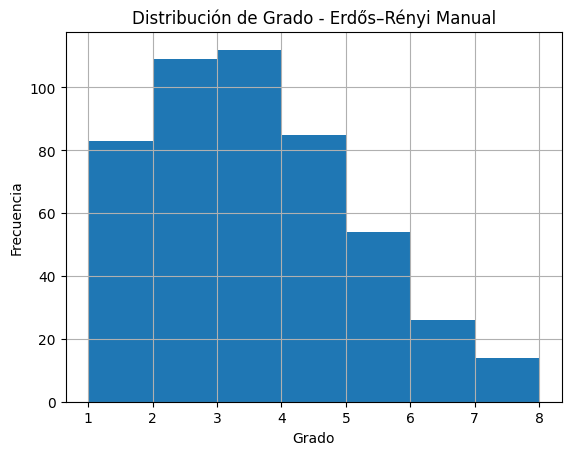

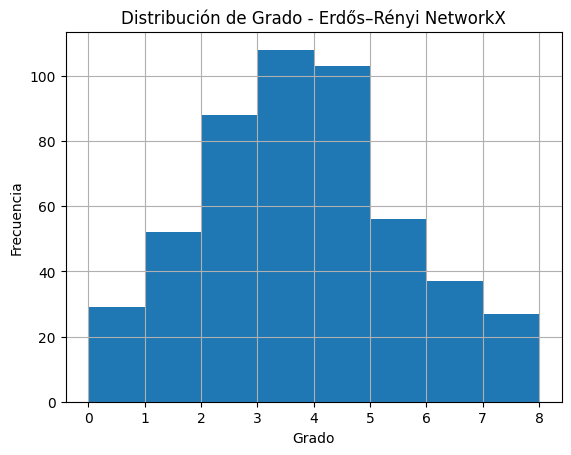

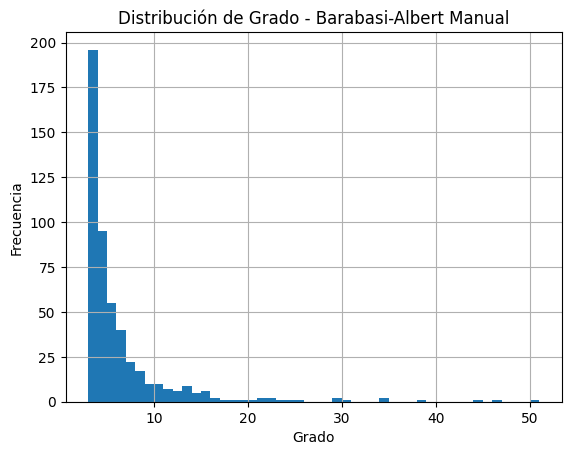

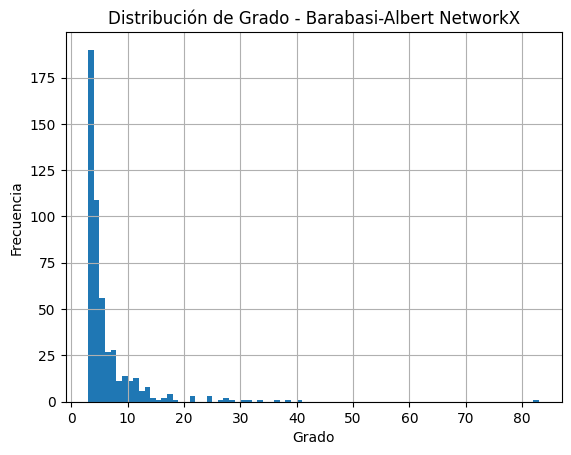


(Longitud de camino medio, Coeficiente de agrupamiento)

Erdős–Rényi Manual:	 (nan, 0.006753426008084394)

Erdős–Rényi NetworkX:	 (nan, 0.007985714285714285)

Barabasi-Albert Manual:	 (3.312569138276553, 0.0422105151836255)

Barabasi-Albert NetworkX: (3.270733466933868, 0.0571472832503332)


In [ ]:
n = 500
m = 3
p = m / (n - 1)

my_er = erdosRenyi(n, p)
my_ba = barabasiAlbert(n, m)
nx_er = nx.erdos_renyi_graph(n, p)
nx_ba = nx.barabasi_albert_graph(n, m)


def createGraphFromEdges(edges):
    graph = nx.Graph()
    graph.add_edges_from(edges)
    return graph


my_er_graph = createGraphFromEdges(my_er)
my_ba_graph = createGraphFromEdges(my_ba)



def getNetworkMetrics(g):
  if nx.is_connected(g):
    avg_path_length = nx.average_shortest_path_length(g)
  else:
    avg_path_length = np.nan

  clustering_coeff = nx.average_clustering(g)
  return avg_path_length, clustering_coeff

my_er_metrics = getNetworkMetrics(my_er_graph)
my_ba_metrics = getNetworkMetrics(my_ba_graph)

nx_er_metrics = getNetworkMetrics(nx_er)
nx_ba_metrics = getNetworkMetrics(nx_ba)


def plotDegreeDistribution(graph, title):
  degrees = [degree for node, degree in graph.degree()]
  plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1, 1))
  plt.title(f"Distribución de Grado - {title}")
  plt.xlabel("Grado")
  plt.ylabel("Frecuencia")
  plt.grid(True)
  plt.show()

plotDegreeDistribution(my_er_graph, "Erdős–Rényi Manual")
plotDegreeDistribution(nx_er, "Erdős–Rényi NetworkX")
plotDegreeDistribution(my_ba_graph, "Barabasi-Albert Manual")
plotDegreeDistribution(nx_ba, "Barabasi-Albert NetworkX")

print("\n(Longitud de camino medio, Coeficiente de agrupamiento)")
print("\nErdős–Rényi Manual:\t", my_er_metrics)
print("\nErdős–Rényi NetworkX:\t", nx_er_metrics)
print("\nBarabasi-Albert Manual:\t", my_ba_metrics)
print("\nBarabasi-Albert NetworkX:", nx_ba_metrics)


##### Diferencia entre grafos:

* La red de Erdős–Rényi muestra una distribución más uniforme de grados, ya que las conexiones son aleatorias. Con respecto a la longitud de camino medio, no es posible calcular siempre, puesto que por su naturaleza aleatoria no todos los nodos están conectados obligatoriamente.
* La red de Barabasi-Albert muestra una distribución de grado sesgada, con algunos nodos de alto grado, lo cual es característico de redes libres de escala. La longitud de camino medio siempre está muy cercana a 3, pero este resultado no es porque el m ingresado es 3, es decir (lcm != 3)

Análisis de gráficos:
* Para las redes Erdős–Rényi: se puede apreciar que la distribución de los grados de los nodos de este tipo de redes siguen una distribución de Poisson, es decir que el histograma tiene la forma de campana, solo que esta está un poco desplazada hacia la izquierda.
* Para las redes Barabasi-Albert: a diferencia del tipo de red anterior, las distribuciones de los grados de los nodos de este tipo de red sigue una distribución logarítmica, esto tiene sentido porque los nodos que ingresaron primero tienen más conexiones por como funciona el algoritmo de creación de este tipo de redes.

# 3. (8 puntos)
Utilizando la librería Networkx analizar la red del dataset, calcular las métricas vistas en clase, en base al análisis verificar si la red es aleatoria, mundo pequeño y/o libre de escala (Justifique su respuesta).

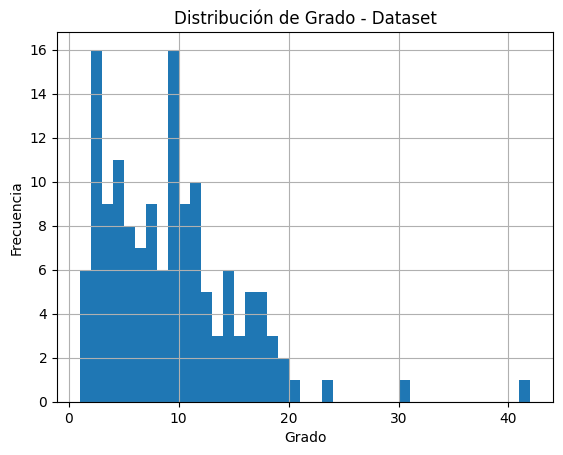

Grado medio: 8.713286713286713
Coeficiente de clustering: 0.43390702914792223
Longitud de camino medio: 2.967004826159756
Diámetro: 8


In [ ]:
df = pd.read_csv('./ia-enron-only.csv', header = None)
G = nx.from_pandas_edgelist(df, source=df.columns[0], target=df.columns[1])

average_degree = sum(dict(G.degree()).values()) / len(G)
clustering_coeff = nx.average_clustering(G)
average_path_length = nx.average_shortest_path_length(G)
diameter = nx.diameter(G)


plotDegreeDistribution(G, "Dataset")

print("Grado medio:", average_degree)
print("Coeficiente de clustering:", clustering_coeff)
print("Longitud de camino medio:", average_path_length)
print("Diámetro:", diameter)

* Red de mundo pequeño: Sí, cumple con las características clásicas de este tipo de red, como un alto coeficiente de clustering y una baja longitud de camino medio.
* Red libre de escala: No parece ser una red libre de escala, ya que la distribución del grado no sigue una ley de potencia clara.
* Red aleatoria: Dado el coeficiente de clustering relativamente alto, la red no parece ser completamente aleatoria.